In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.metrics import auc, roc_curve, accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
#Load data

df = pd.read_csv("Data_Assas_2023.csv").drop(columns= "Unnamed: 0")
print("Shape : ", df.shape)
print("Colonnes : ", df.columns)
df.head()

Shape :  (150000, 11)
Colonnes :  Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.76613,45,2,0.80298,9120.00000,13,0,6,0,2.00000
1,0,0.95715,40,0,0.12188,2600.00000,4,0,0,0,1.00000
2,0,0.65818,38,1,0.08511,3042.00000,2,1,0,0,0.00000
3,0,0.23381,30,0,0.03605,3300.00000,5,0,0,0,0.00000
4,0,0.90724,49,1,0.02493,63588.00000,7,0,1,0,0.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
#Look for descriptive statistics :

df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00000,150000.00000,150000.00000,150000.00000,150000.00000,120269.00000,150000.00000,150000.00000,150000.00000,150000.00000,146076.00000
mean,0.06684,6.04844,52.29521,0.42103,353.00508,6670.22124,8.45276,0.26597,1.01824,0.24039,0.75722
std,0.24975,249.75537,14.77187,4.19278,2037.81852,14384.67422,5.14595,4.16930,1.12977,4.15518,1.11509
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.02987,41.00000,0.00000,0.17507,3400.00000,5.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.15418,52.00000,0.00000,0.36651,5400.00000,8.00000,0.00000,1.00000,0.00000,0.00000
75%,0.00000,0.55905,63.00000,0.00000,0.86825,8249.00000,11.00000,0.00000,2.00000,0.00000,1.00000
max,1.00000,50708.00000,109.00000,98.00000,329664.00000,3008750.00000,58.00000,98.00000,54.00000,98.00000,20.00000


# Focus on target variable

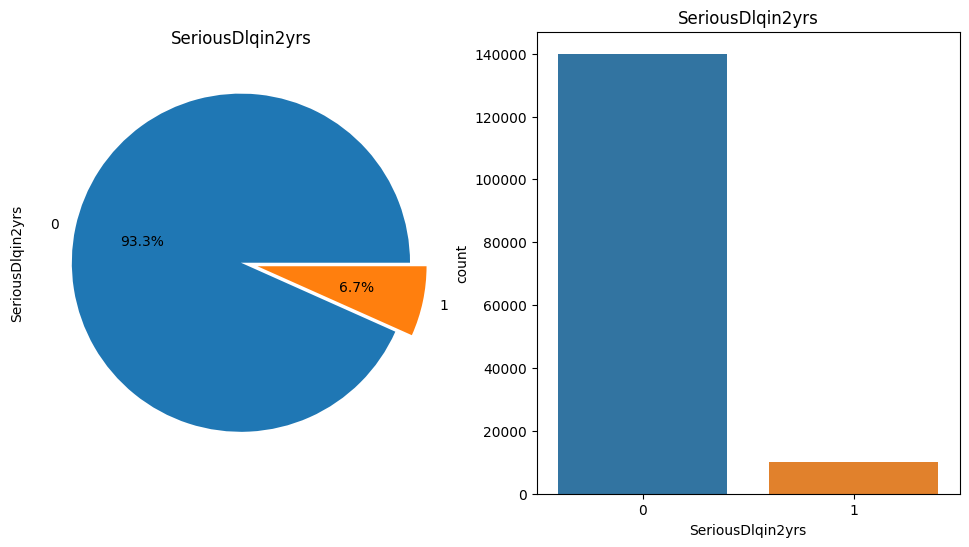

In [6]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')
#ax[0].set_ylabel('')
sns.countplot(x = df['SeriousDlqin2yrs'])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()

## We investigate late in paiement

In [9]:
df[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate' ]].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,150000.00000,150000.00000,150000.00000
mean,0.42103,0.24039,0.26597
std,4.19278,4.15518,4.16930
min,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000
75%,0.00000,0.00000,0.00000
max,98.00000,98.00000,98.00000


In [10]:
print("values for range 30-59 days : ", df['NumberOfTime30-59DaysPastDueNotWorse'].unique())
print("values for range 60-89 days : ", df['NumberOfTime60-89DaysPastDueNotWorse'].unique())
print("values for range 90 days : ", df['NumberOfTimes90DaysLate'].unique())

values for range 30-59 days :  [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
values for range 60-89 days :  [ 0  1  2  5  3 98  4  6  7  8 96 11  9]
values for range 90 days :  [ 0  1  3  2  5  4 98 10  9  6  7  8 15 96 11 13 14 17 12]


In [11]:
# We notice that we always have the following values : 96 and 98, how many individuals are concerned ?

print(df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"] > 90].shape)
print(df.loc[df["NumberOfTime60-89DaysPastDueNotWorse"] > 90].shape)
print(df.loc[df["NumberOfTimes90DaysLate"] > 90].shape)

#We Will replace these valeues by their max
print("Max 30-59days late : ", df["NumberOfTime30-59DaysPastDueNotWorse"].max())
print("Max 60-89days late : ", df["NumberOfTime60-89DaysPastDueNotWorse"].max())
print("Max 90 days late : ", df["NumberOfTimes90DaysLate"].max())

df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"] > 90,"NumberOfTime30-59DaysPastDueNotWorse"] = 13
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] > 90,'NumberOfTime60-89DaysPastDueNotWorse'] = 11
df.loc[df["NumberOfTimes90DaysLate"] > 90,"NumberOfTimes90DaysLate"] = 17

(269, 11)
(269, 11)
(269, 11)
Max 30-59days late :  98
Max 60-89days late :  98
Max 90 days late :  98


# Investigation of Total balance on Credit Cards and personal lines of Credit

In [12]:
# A ratio > 1 represents a serious defaulter
df["RevolvingUtilizationOfUnsecuredLines"].describe()

count   150000.00000
mean         6.04844
std        249.75537
min          0.00000
25%          0.02987
50%          0.15418
75%          0.55905
max      50708.00000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [13]:
# Looking at the quantile, we notice outliers. We fix our treshold to 10

df = df[df["RevolvingUtilizationOfUnsecuredLines"] <= 10]
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count   149759.00000
mean         0.32276
std          0.36675
min          0.00000
25%          0.02978
50%          0.15354
75%          0.55594
max          8.85185
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

# Looking at the Debt Ratio

In [16]:
df["DebtRatio"].describe()

count   149759.00000
mean       352.65279
std       2038.20323
min          0.00000
25%          0.17496
50%          0.36648
75%          0.86695
max     329664.00000
Name: DebtRatio, dtype: float64

In [22]:
# Looking at the quantile, we notice high increase between 0,8 and 0,825.
df["DebtRatio"].quantile([0.75, 0.8, 0.825, 0.85, 0.9])

0.75000      0.86695
0.80000      4.00000
0.82500     44.00000
0.85000    266.30000
0.90000   1265.00000
Name: DebtRatio, dtype: float64

In [23]:
# We will thus investigate individuals before the 0.8 quantile treshold
df = df[df["DebtRatio"] < df["DebtRatio"].quantile(0.8)]
df.shape

(119763, 11)

# Looking at the Monthly Income

In [24]:
df["MonthlyIncome"].describe()

count    117623.00000
mean       6799.84160
std       14511.72059
min           0.00000
25%        3500.00000
50%        5483.00000
75%        8333.00000
max     3008750.00000
Name: MonthlyIncome, dtype: float64

In [28]:
# Looking at the quantile. If they are outliers as suggest by the max in the above cell, they are concentrate on the top of the distriution
df["MonthlyIncome"].quantile([0.75, 0.8, 0.825, 0.85, 0.9, 0.95, 0.97])

0.75000    8333.00000
0.80000    9166.00000
0.82500    9750.00000
0.85000   10200.00000
0.90000   11700.00000
0.95000   14700.00000
0.97000   17100.68000
Name: MonthlyIncome, dtype: float64

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(-500000.0, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0'),
  Text(3500000.0, 0, '3.5')])

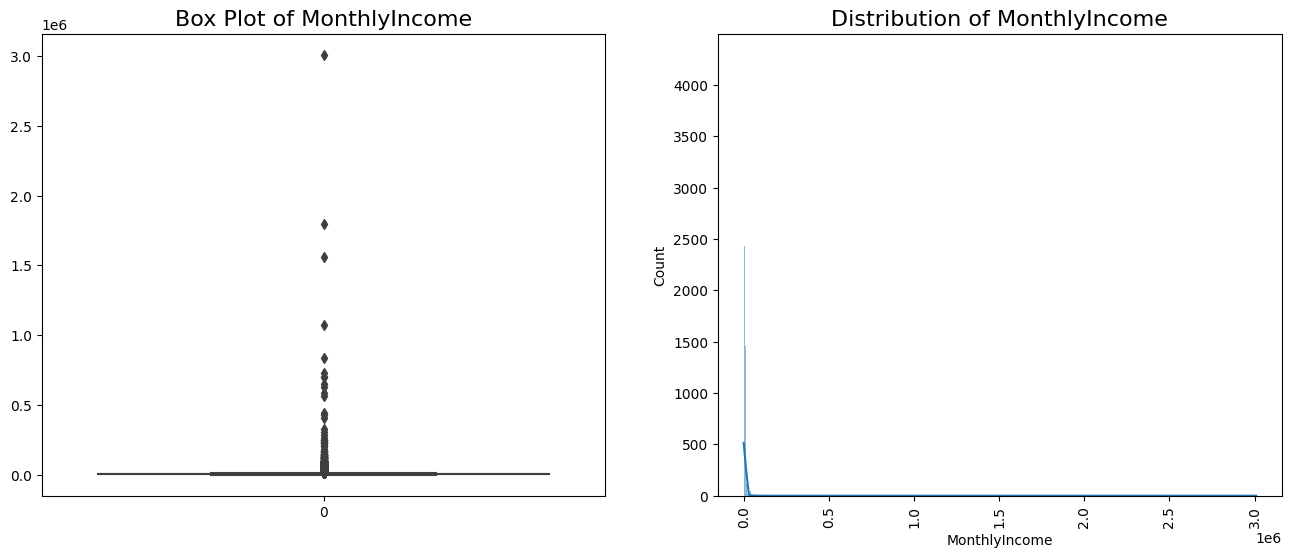

In [25]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df['MonthlyIncome'], ax = axes[0])
axes[0].set_title('Box Plot of MonthlyIncome', size=16)
sns.histplot(df['MonthlyIncome'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of MonthlyIncome', size=16)
plt.xticks(rotation=90)

In [30]:
# check the proportion of defaulter in the top of the distribution. 4% of individuals saw their credits refuses which is less than the total population. We expects that outliers in monthly income if they existt 
# not have a significant impact on the results

df.loc[df["MonthlyIncome"] > df["MonthlyIncome"].quantile(0.975)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,2941.00000,2941.00000,2941.00000,2941.00000,2941.00000,2941.00000,2941.00000,2941.00000,2941.00000,2941.00000,2941.00000
mean,0.04964,0.29675,54.03128,0.26352,0.21631,35643.25910,11.80279,0.04794,2.14383,0.05406,1.30670
std,0.21724,0.33999,10.93483,0.75114,0.18164,84265.47965,6.37980,0.44349,2.22449,0.38084,1.33368
min,0.00000,0.00000,24.00000,0.00000,0.00000,18141.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.04017,46.00000,0.00000,0.08616,20000.00000,7.00000,0.00000,1.00000,0.00000,0.00000
50%,0.00000,0.16332,54.00000,0.00000,0.19144,23257.00000,11.00000,0.00000,2.00000,0.00000,1.00000
75%,0.00000,0.47115,62.00000,0.00000,0.30143,31250.00000,15.00000,0.00000,3.00000,0.00000,2.00000
max,1.00000,5.36114,94.00000,13.00000,2.60425,3008750.00000,57.00000,17.00000,32.00000,11.00000,8.00000


# Number of Dependents

2.5


Text(0.5, 1.0, 'Distribution of NumberOfDependents')

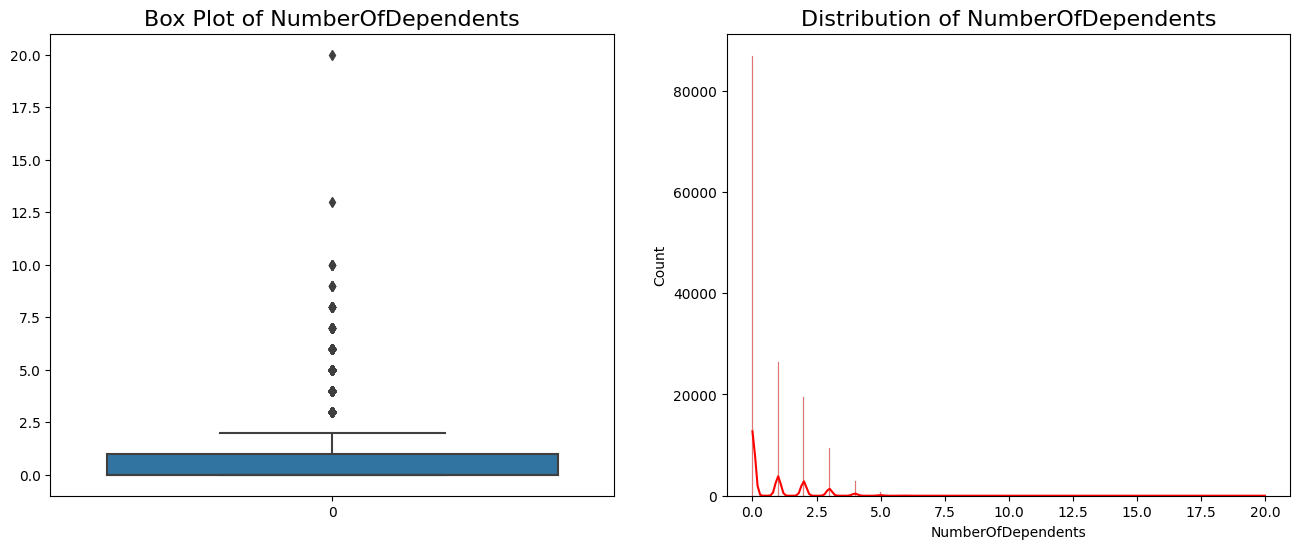

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df['NumberOfDependents'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfDependents', size=16)
sns.histplot(df['NumberOfDependents'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of NumberOfDependents', size=16)

# NumberRealEstateLoansOrLines

5.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

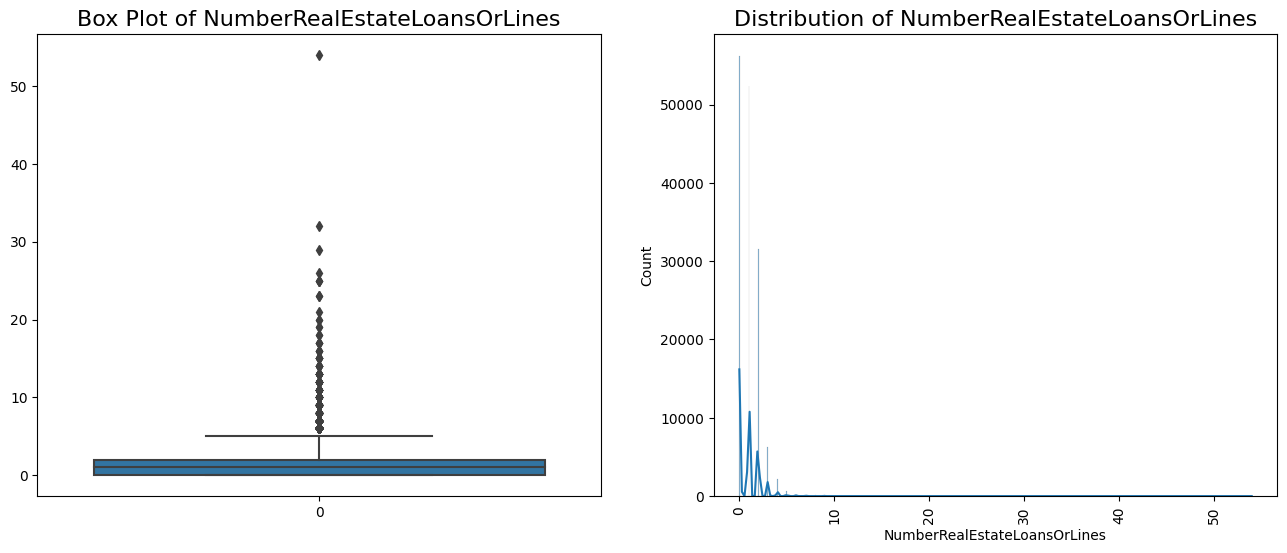

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df['NumberRealEstateLoansOrLines'], ax = axes[0])
axes[0].set_title('Box Plot of NumberRealEstateLoansOrLines', size=16)
sns.histplot(df['NumberRealEstateLoansOrLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberRealEstateLoansOrLines', size=16)
plt.xticks(rotation=90)

# NumberOfOpenCreditLinesAndLoans

20.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

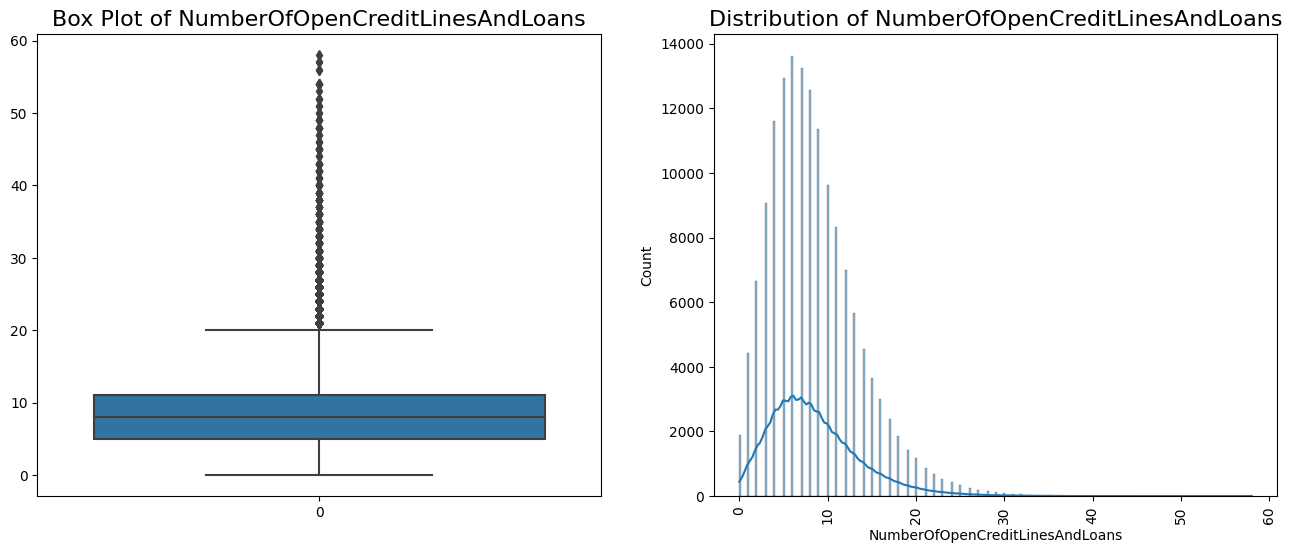

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df['NumberOfOpenCreditLinesAndLoans'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfOpenCreditLinesAndLoans', size=16)
sns.histplot(df['NumberOfOpenCreditLinesAndLoans'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberOfOpenCreditLinesAndLoans', size=16)
plt.xticks(rotation=90)

20.0

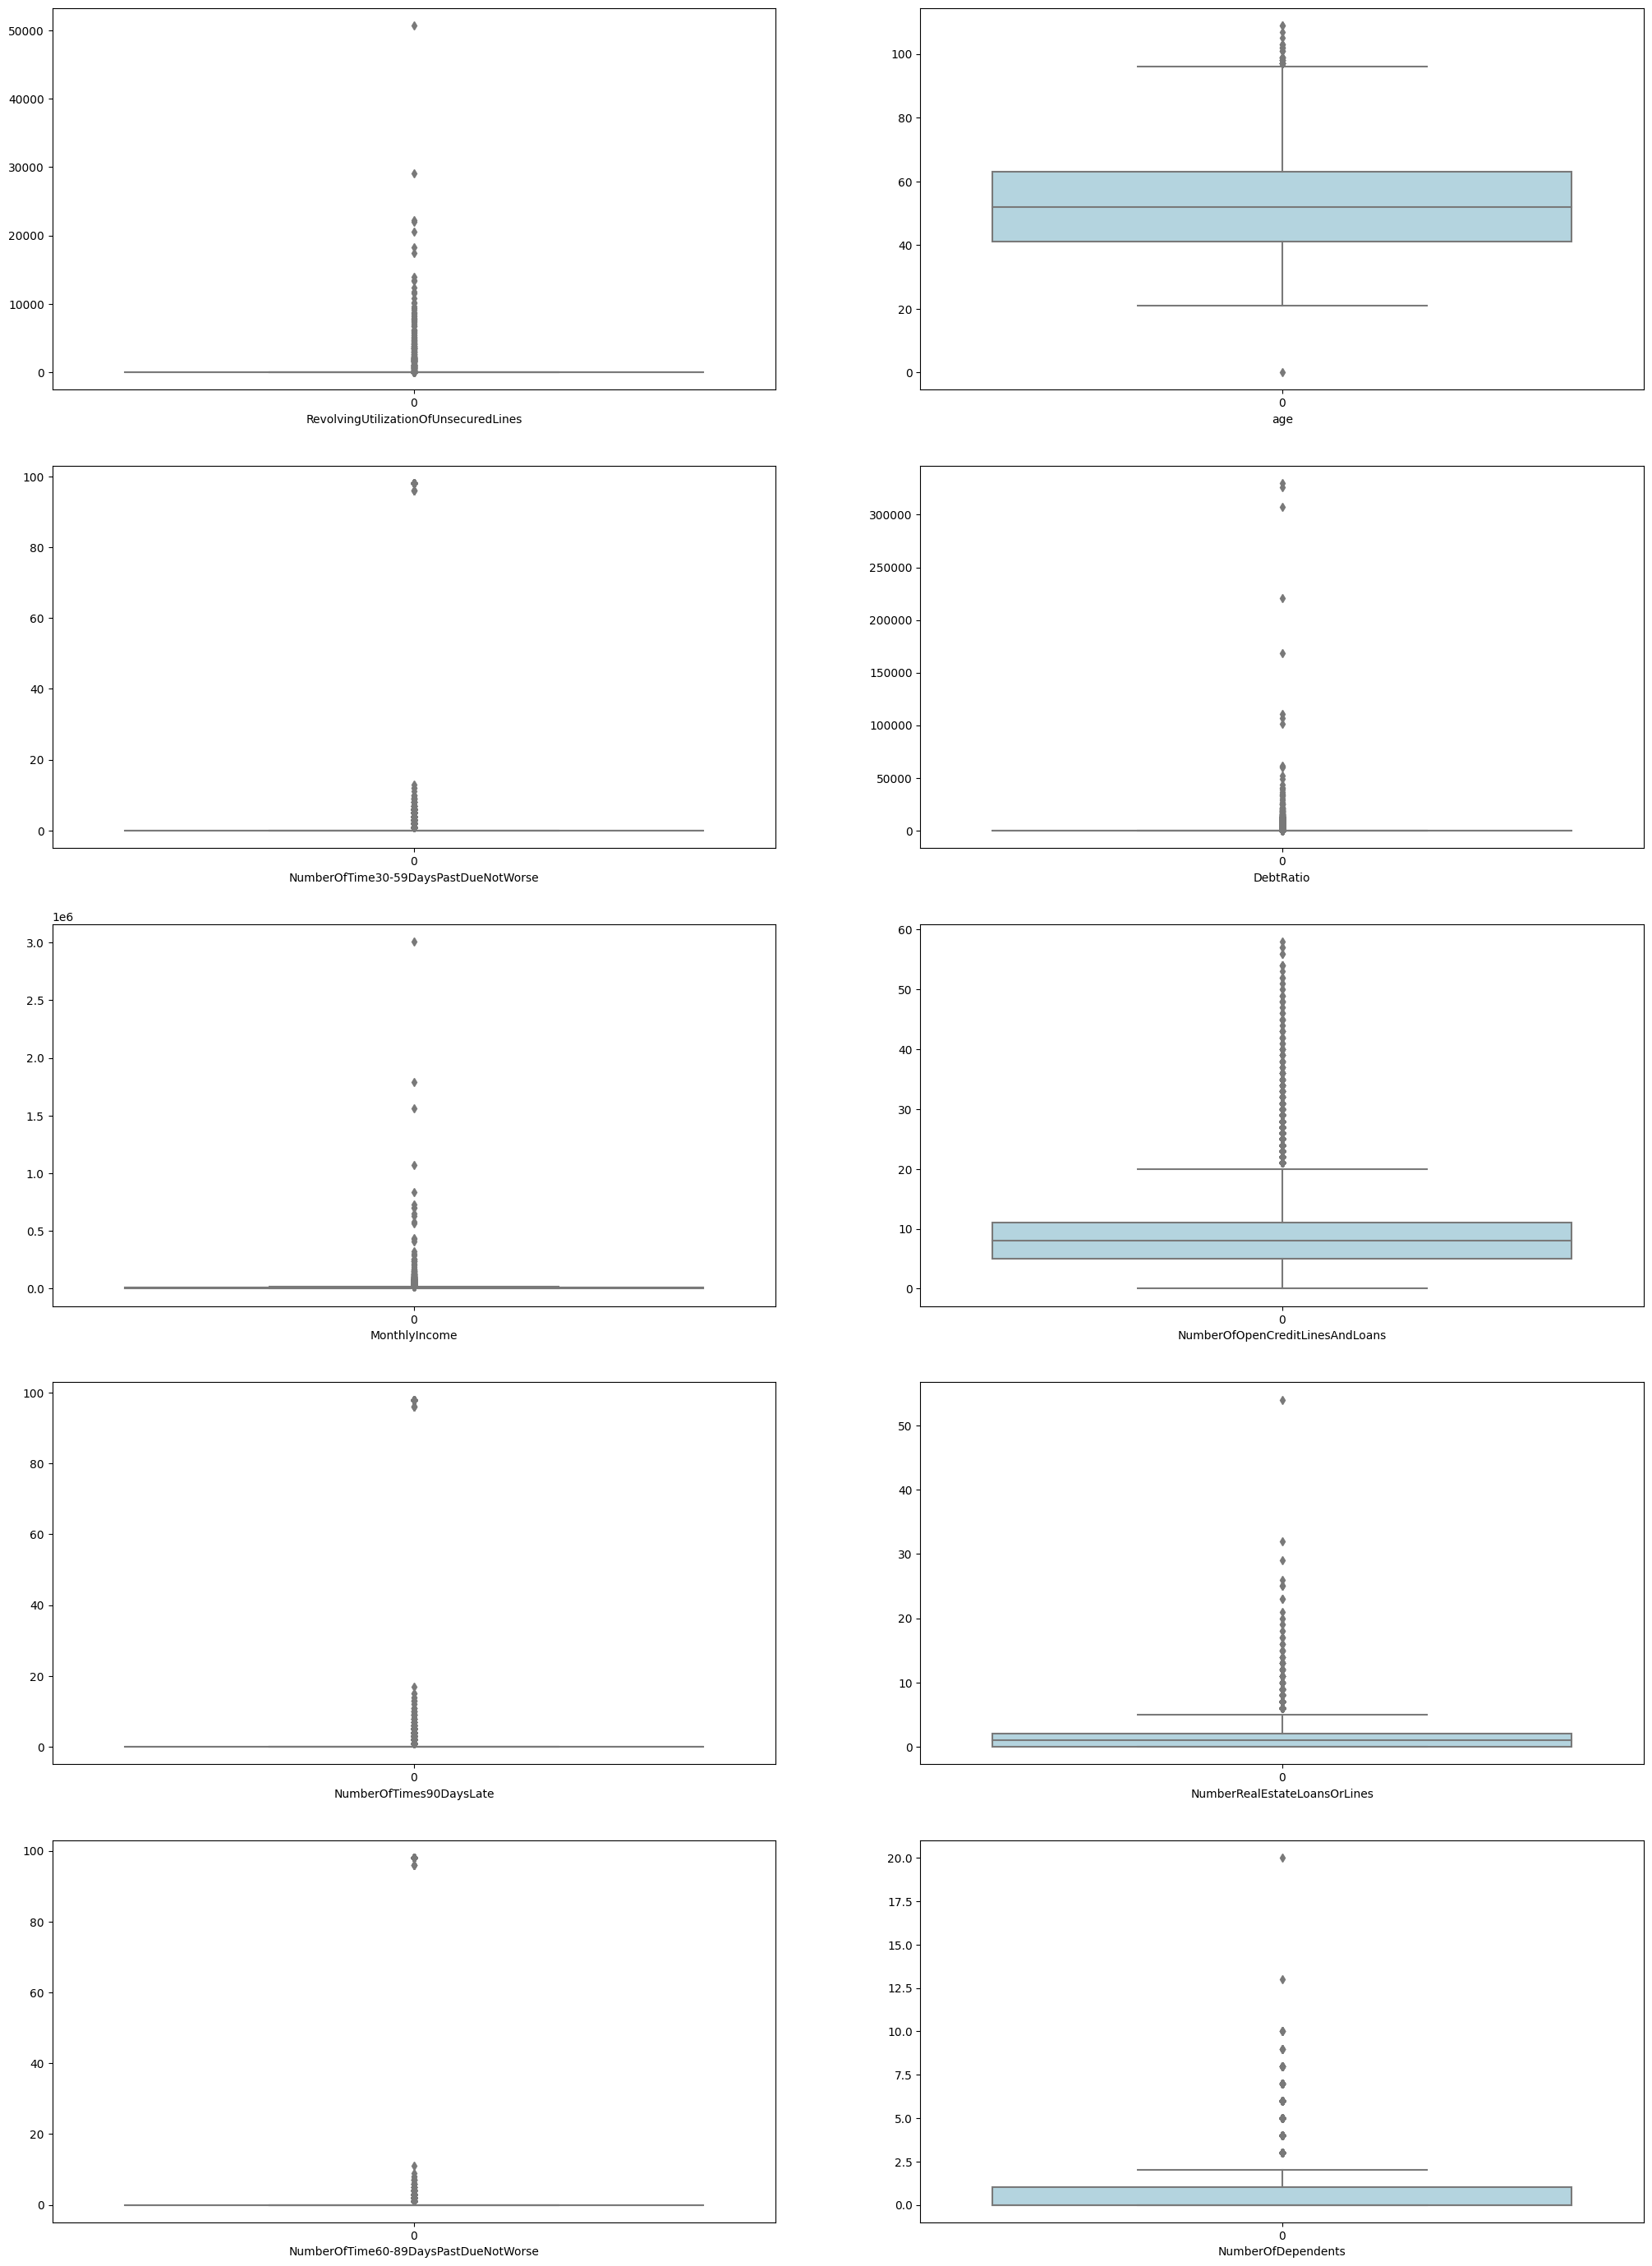

In [ ]:
#It seems that we have outliers, we will thus plot box plot for each columns
fig, ax = plt.subplots(5, 2,figsize=(25, 35))
i = 1

for col in df.drop(columns="SeriousDlqin2yrs").columns:
    plt.subplot(5, 2, i)
    sns.boxplot(df[col], color= "lightblue")
    plt.xlabel(col)
    i+=1


# Handle NAs

In [48]:
#Check for Missing values :

df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [47]:
# We have reduced our NAs number by our process, but some of them are still there. Thus, We will replace NA in Monthly Income by the median and the NA in Dependents by 0

df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(0)

# Export

In [97]:
df.to_csv("Credit_Risk_clean.csv", ";")

# Machine Learning

In [49]:
# Clean Datafram of outliers for splitting

df_clean = df.copy()

print("Dimension : ", df_clean.shape)
df_clean.describe()

Dimension :  (119763, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000
mean,0.06975,0.33460,51.49329,0.28424,0.35809,6776.31145,8.66745,0.12577,1.03673,0.08878,0.83825
std,0.25472,0.36628,14.60366,0.91450,0.36804,14382.54084,5.20220,0.90117,1.13750,0.59245,1.14258
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.03326,41.00000,0.00000,0.13360,3500.00000,5.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.17508,51.00000,0.00000,0.28733,5483.00000,8.00000,0.00000,1.00000,0.00000,0.00000
75%,0.00000,0.58283,62.00000,0.00000,0.46716,8250.00000,11.00000,0.00000,2.00000,0.00000,1.00000
max,1.00000,8.85185,105.00000,13.00000,3.99401,3008750.00000,57.00000,17.00000,32.00000,11.00000,20.00000


In [87]:
X = df_clean.drop("SeriousDlqin2yrs", axis = 1)
y = df_clean["SeriousDlqin2yrs"].to_numpy()
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.76613,45,2,0.80298,9120.00000,13,0,6,0,2.00000
1,0.95715,40,0,0.12188,2600.00000,4,0,0,0,1.00000
2,0.65818,38,1,0.08511,3042.00000,2,1,0,0,0.00000
3,0.23381,30,0,0.03605,3300.00000,5,0,0,0,0.00000
4,0.90724,49,1,0.02493,63588.00000,7,0,1,0,0.00000
...,...,...,...,...,...,...,...,...,...,...
149994,0.38574,50,0,0.40429,3400.00000,7,0,0,0,0.00000
149995,0.04067,74,0,0.22513,2100.00000,4,0,1,0,0.00000
149996,0.29975,44,0,0.71656,5584.00000,4,0,1,0,2.00000
149998,0.00000,30,0,0.00000,5716.00000,4,0,0,0,0.00000


# Data Normalization

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.08654987, 0.42857143, 0.15384615, ..., 0.1875    , 0.        ,
        0.1       ],
       [0.10813003, 0.38095238, 0.        , ..., 0.        , 0.        ,
        0.05      ],
       [0.07435508, 0.36190476, 0.07692308, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03386242, 0.41904762, 0.        , ..., 0.03125   , 0.        ,
        0.1       ],
       [0.        , 0.28571429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09605707, 0.60952381, 0.        , ..., 0.0625    , 0.        ,
        0.        ]])

# Split dataset

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [90]:
print("X_train dimension : ", X_train.shape)
print("y_train dimension : ", y_train.shape)
print("X_test dimension : ", X_test.shape)
print("y_test dimension : ", y_test.shape)

X_train dimension :  (95810, 10)
y_train dimension :  (95810,)
X_test dimension :  (23953, 10)
y_test dimension :  (23953,)


# Logistic Regression 

Accuracy Score :  0.7886277293032188
F1 Score :  0.3316171617161716
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     22254
           1       0.21      0.74      0.33      1699

    accuracy                           0.79     23953
   macro avg       0.59      0.77      0.60     23953
weighted avg       0.92      0.79      0.84     23953



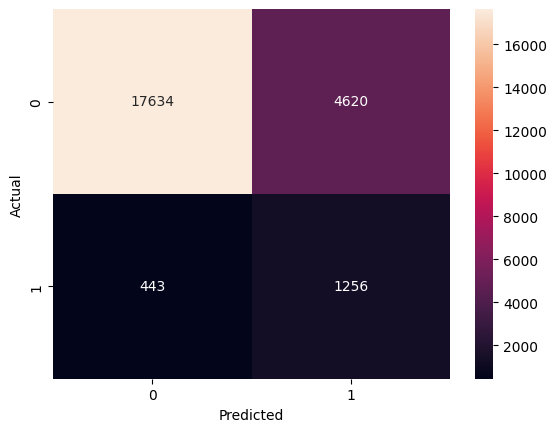

In [91]:
log = LogisticRegression(class_weight= 'balanced')
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [92]:
probs = log.predict_proba(X_test)
probs

array([[0.78504563, 0.21495437],
       [0.75626654, 0.24373346],
       [0.64122656, 0.35877344],
       ...,
       [0.91568086, 0.08431914],
       [0.76419986, 0.23580014],
       [0.60408044, 0.39591956]])

In [93]:
probs = probs[:,1]
probs

array([0.21495437, 0.24373346, 0.35877344, ..., 0.08431914, 0.23580014,
       0.39591956])

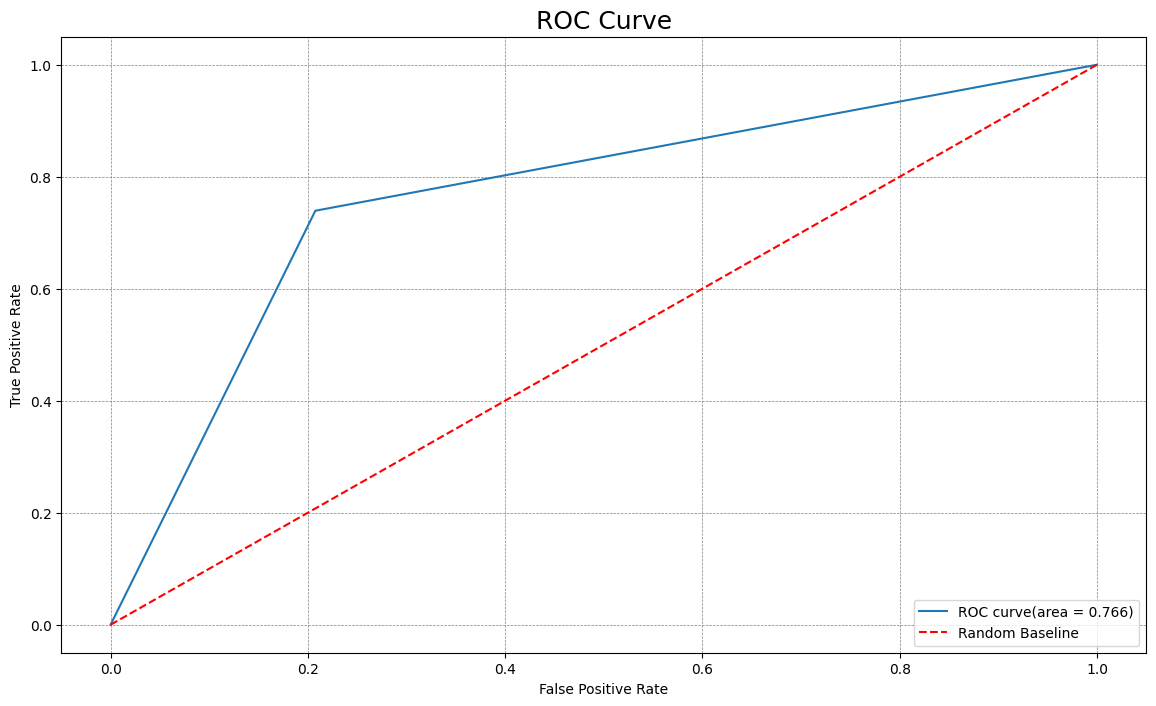

In [96]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

Accuracy Score :  0.8974241222393855
F1 Score :  0.25477707006369427
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     22254
           1       0.26      0.25      0.25      1699

    accuracy                           0.90     23953
   macro avg       0.60      0.60      0.60     23953
weighted avg       0.89      0.90      0.90     23953



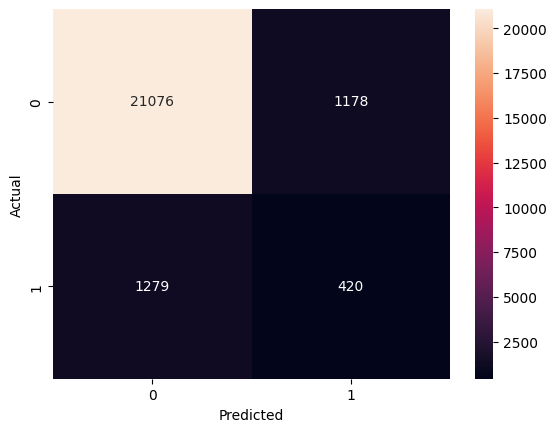

In [66]:
Tree_clf = DecisionTreeClassifier(random_state= 42, class_weight= "balanced")
Tree_clf.fit(X_train, y_train)

y_pred = Tree_clf.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

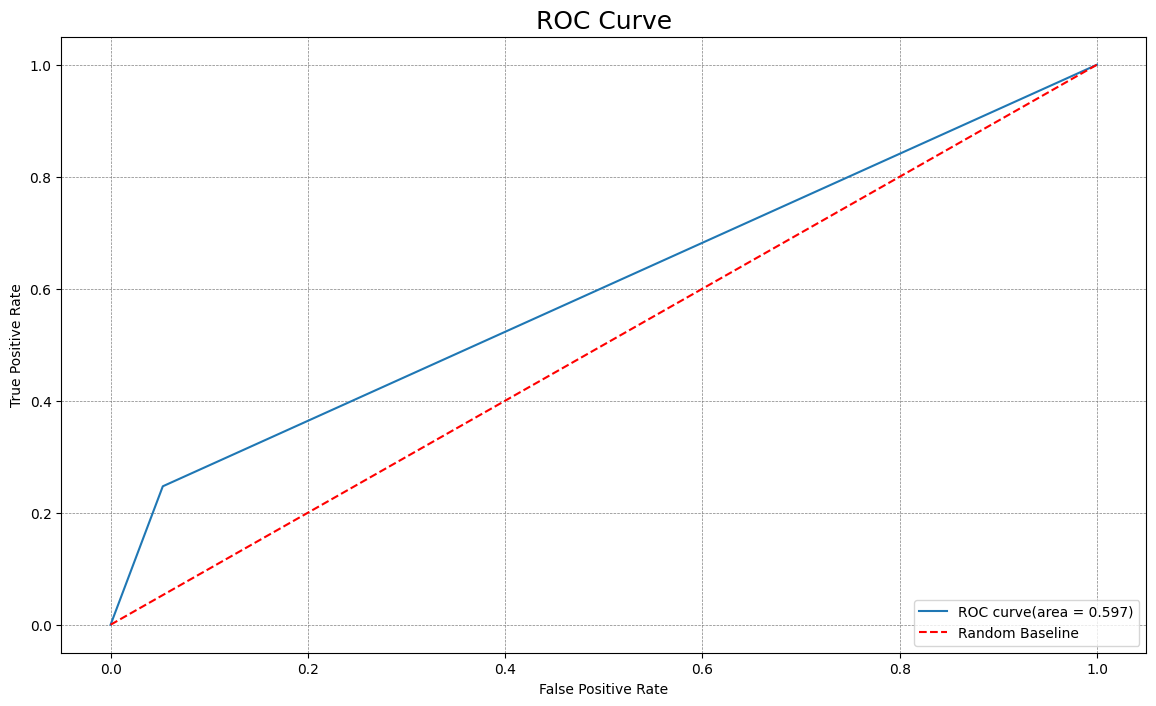

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

# XGBOOST

Accuracy Score :  0.9330355279088215
F1 Score :  0.2908930150309461
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22254
           1       0.58      0.19      0.29      1699

    accuracy                           0.93     23953
   macro avg       0.76      0.59      0.63     23953
weighted avg       0.92      0.93      0.92     23953



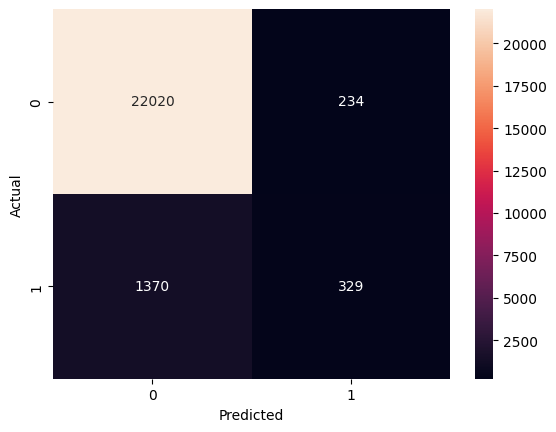

In [61]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

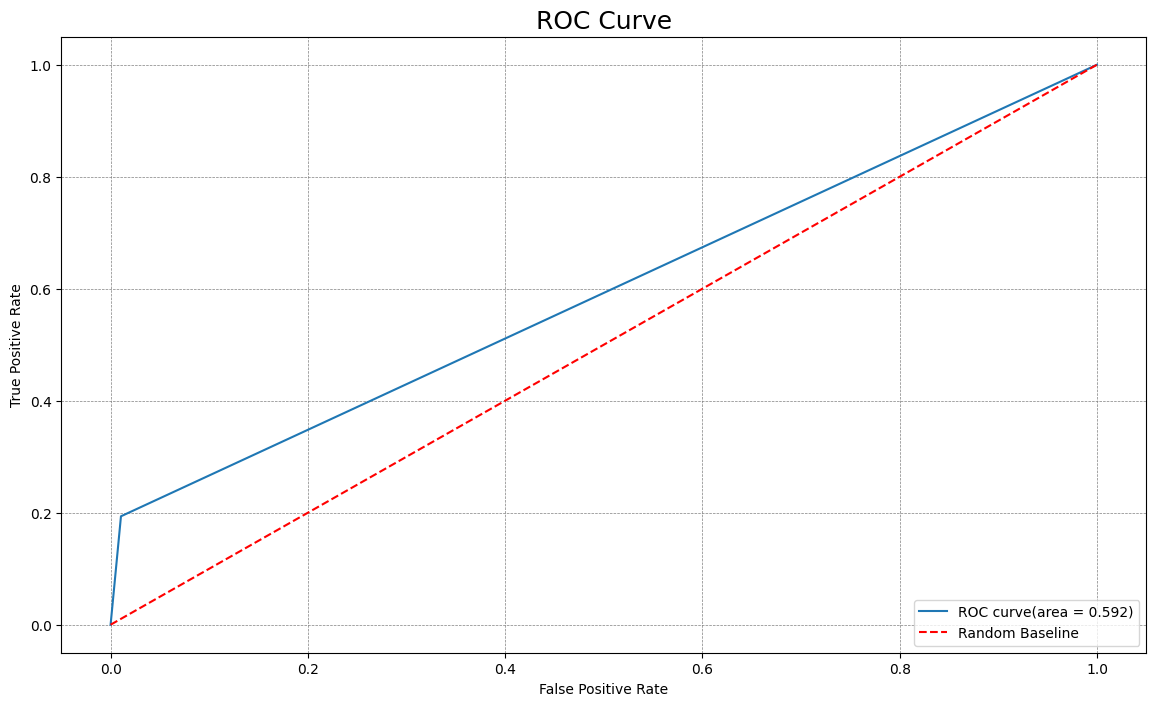

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")